# Will it Turing?

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper', font_scale=1.4)

In [22]:
x = np.arange(0, 101, 1)

D = 0.1
d = 0.01


def test_diffusion_model(legend, coupling):
    """Plot gradient from source and Turing pattern"""
    def source(_, c):
        dcdt = D*coupling(c) - d*c
        dcdt[0] = 0
        return dcdt


    def turing(_, uv):
        u = uv[:101]
        v = uv[101:]

        dudt = 0.1 - u + u**2/v + 3*coupling(u)
        dvdt = u**2 - v + 60*coupling(v)
        return np.append(dudt, dvdt)


    plt.figure(figsize=(12, 3))

    analytic_gradient = np.exp(-np.sqrt(d/D)*x)
    c_0 = np.append(1, np.zeros(len(x) - 1))
    c_df_source = solve_ivp(source, [0, 1e3], c_0, 'BDF')

    plt.subplot2grid(shape=(1, 4), loc=(0, 0))
    plt.plot(x[:26], analytic_gradient[:26], 'k')
    plt.plot(x[:26], c_df_source.y[:, -1][:26], 'ko')
    plt.legend(['Exponential', legend])
    plt.xlim([-1, 26])
    plt.yticks([])
    sns.despine()

#     uv_0 = np.random.rand(len(x)*2)/100
#     uv_turing = solve_ivp(turing, [0, 1e3], uv_0, 'BDF')

#     plt.subplot2grid(shape=(1, 4), loc=(0, 1), colspan=3)
#     plt.plot(x, uv_turing.y[:, -1][101:], 'ko')
#     plt.xlim([-1, 101])
# #     plt.yticks([])
#     sns.despine()

    plt.tight_layout()
#     plt.savefig(legend.replace(' ', '_').replace("'", '').replace('.', '') + '.svg')
    plt.show()

## Fick's Law

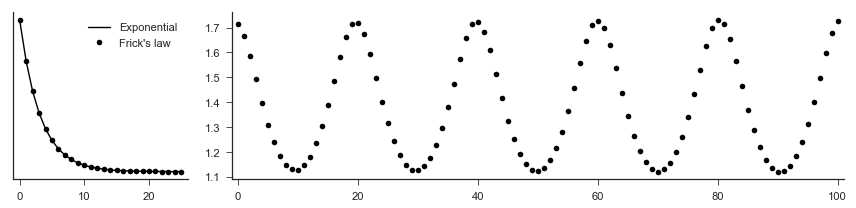

In [13]:
def fd_diffusion(u):
    """Finite difference scheme for Fick's law"""
    lapl = np.empty(len(u))
    lapl[0] = -u[0] + u[1]
    lapl[1:-1] = u[:-2] - 2*u[1:-1] + u[2:]
    lapl[-1] = u[-2] - u[-1]
    return lapl

test_diffusion_model("Frick's law", fd_diffusion)

## Porous Medium

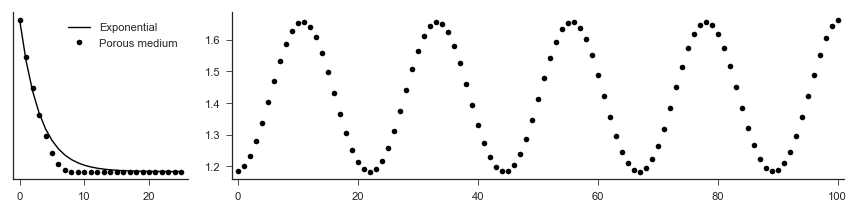

In [4]:
def porous_diff(u):
    """Finite difference scheme for porous medium with m = 1"""
    grad = np.empty(len(u))
    grad[0] = u[0] - u[1]
    grad[1:-1] = (u[:-2] - u[2:])/2
    grad[-1] = u[-2] - u[-1]
    
    lapl = np.empty(len(u))
    lapl[0] = -u[0] + u[1]
    lapl[1:-1] = u[:-2] - 2*u[1:-1] + u[2:]
    lapl[-1] = u[-2] - u[-1]

    return (grad*grad + u*lapl)

test_diffusion_model('Porous medium', porous_diff)

## Polarized Tissue

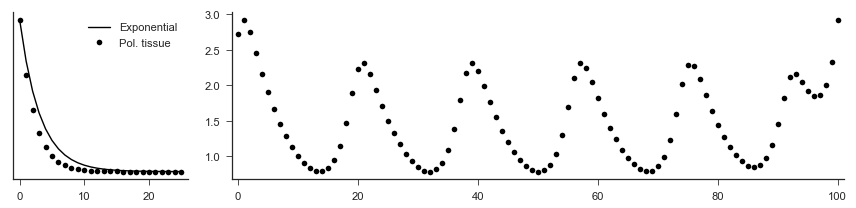

In [5]:
def asymmetric_diffusion(u):
    r = 0.75
    diff = np.empty(len(u))
    diff[0] = -u[0] + u[1]*r
    diff[1:-1] = u[:-2] - (1 + r)*u[1:-1] + u[2:]*r
    diff[-1] = u[-2] - r*u[-1]
    return diff/3

test_diffusion_model('Pol. tissue', asymmetric_diffusion)

## Cytoneme Transport

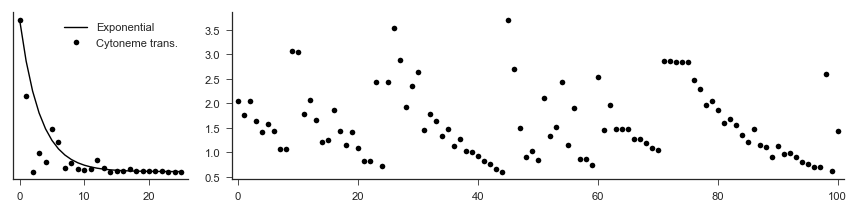

In [7]:
right_cytonemes = np.random.poisson(2, len(x))
left_cytonemes = np.random.poisson(2, len(x))

def cytoneme_transport(u):
    left = np.maximum(np.arange(len(x)) - left_cytonemes, 0)
    right = np.minimum(np.arange(len(x)) - right_cytonemes, len(x) - 1)
    diff = u[left] - 2*u + u[right]
    return diff/20

test_diffusion_model('Cytoneme trans.', cytoneme_transport)

## Cell-cell Communication

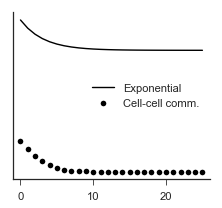

In [27]:
def cell_cell(u):
    r = 0
    u -= 1
    diff = np.empty(len(u))
    diff[0] = u[-1] - 2*r*u[0] + u[1]
    diff[1:-1] = u[:-2] - 2*r*u[1:-1] + u[2:]
    diff[-1] = u[-2] - 2*r*u[-1] + u[0]
    return diff/20


test_diffusion_model('Cell-cell comm.', cell_cell)